In [10]:
from lxml import etree
from collections import OrderedDict
from collections import Counter
import matplotlib.pyplot as plt
import pickle
import numpy as np
import datetime
import seaborn as sns
sns.set()


# In[41]:


datamap=OrderedDict()
datamap["android"]="android.stackexchange.com"
datamap["dba"]="dba.stackexchange.com"
datamap["softwareEng"]="softwareengineering.stackexchange.com"
datamap["serverfault"]= "serverfault.com"
datamap["superuser"]="superuser.com"
datamap["stackoverflow"]="stackoverflow.com-"

def process_date(d11,d22):

    d1 = datetime.datetime.strptime(d11, '%Y-%m-%dT%H:%M:%S.%f')
  
    d2 = datetime.datetime.strptime(d22, '%Y-%m-%dT%H:%M:%S.%f')
    
    diff = (d2 - d1).total_seconds() / 60

        
    #print(d1,d2,diff)
    return diff

def get_boxplot(bp,f,dm):
    print(dm)
    for m,m2,i,d in zip(bp['boxes'],bp['medians'],range(0,len(bp['caps']),2),dm):
        ldata=m.get_ydata()
        q3=ldata[2]
        q1=ldata[0]
        med=m2.get_ydata()[0]   
        minx=bp['caps'][i].get_ydata()[0]
        maxx=bp['caps'][i+1].get_ydata()[0]
        print(minx,maxx,q1,med,q3)
        boxinfo=[minx,maxx,q1,med,q3]
        f.write(d+","+str(",".join([str(i) for i in boxinfo]))+"\n")
    
 
def boxplt(data,fname,title,ticks,f):
    
    plt.close()
    plt.clf()
    keypick=[i for i in range(1,len(data)+1)]
    plt.subplots(figsize=(6,3),dpi=600)
    bp=plt.boxplot([data[i] for i in data])
    get_boxplot(bp,f,data.keys())
    plt.xlabel("Years")
    plt.ylabel("Time (in hours)")
    plt.xticks(keypick,ticks)  
    #plt.title(fname.upper())

    plt.show()
    
def meanPlot(data,fname,ticks,f):
    plt.close()
    plt.clf()
 
#     for i in data:
#         f.write(i+","+str(np.mean(data[i]))+","+str(np.std(data[i]))+"\n")
    keypick=[i for i in range(1,len(data)+1)]
    plt.subplots(figsize=(6,3),dpi=600)
    plt.bar(keypick,[np.mean(data[i]) for i in data],label="Mean",color="b")
    plt.plot(keypick,[np.std(data[i]) for i in data],color="g")
    plt.scatter(keypick,[np.std(data[i]) for i in data],label="StD",color="g")
    plt.legend(loc="upper left")
    plt.xlabel("Years")
    plt.ylabel("Time (in mins)")
    #plt.xlim(0,7)
    print(keypick,[i for i in data])
    plt.xticks(keypick,ticks)
    
    #plt.title(fname.upper())
    plt.show()
    
def init_data():
    data=OrderedDict()
    syear=2008
    eyear=2017
    for i in range(syear,eyear+1):
        data[str(i)]=[]
    return data

In [13]:
def distribute_posts(fname,data):
    wrap=set()
    if fname=="stackoverflow" and datamap[fname]=="stackoverflow.com-":
        datamap[fname]=datamap[fname]+"Posts"   
    

    f=open("time."+fname+".txt","r")
    data[fname]=[]
    count=0
    for l in f:
        row=l.split(",")
        year=row[1].split("T")[0].split("-")[0]
        diff=process_date(row[1],row[2].strip())
        if diff==0.0:
            wrap.add(row[0])
            #print(row[0])
            #pass
            count+=1
            
        data[fname].append(diff)
    print(count,len(wrap))
    
#     print(data)
    #meanPlot(data,fname)
    return data
    #boxplt(data,fname,fname)
 
        

In [7]:
process_date("2011-03-09T22:54:14.603","2011-03-09T22:53:14.603")

-1.0

0 0
[1] ['android']


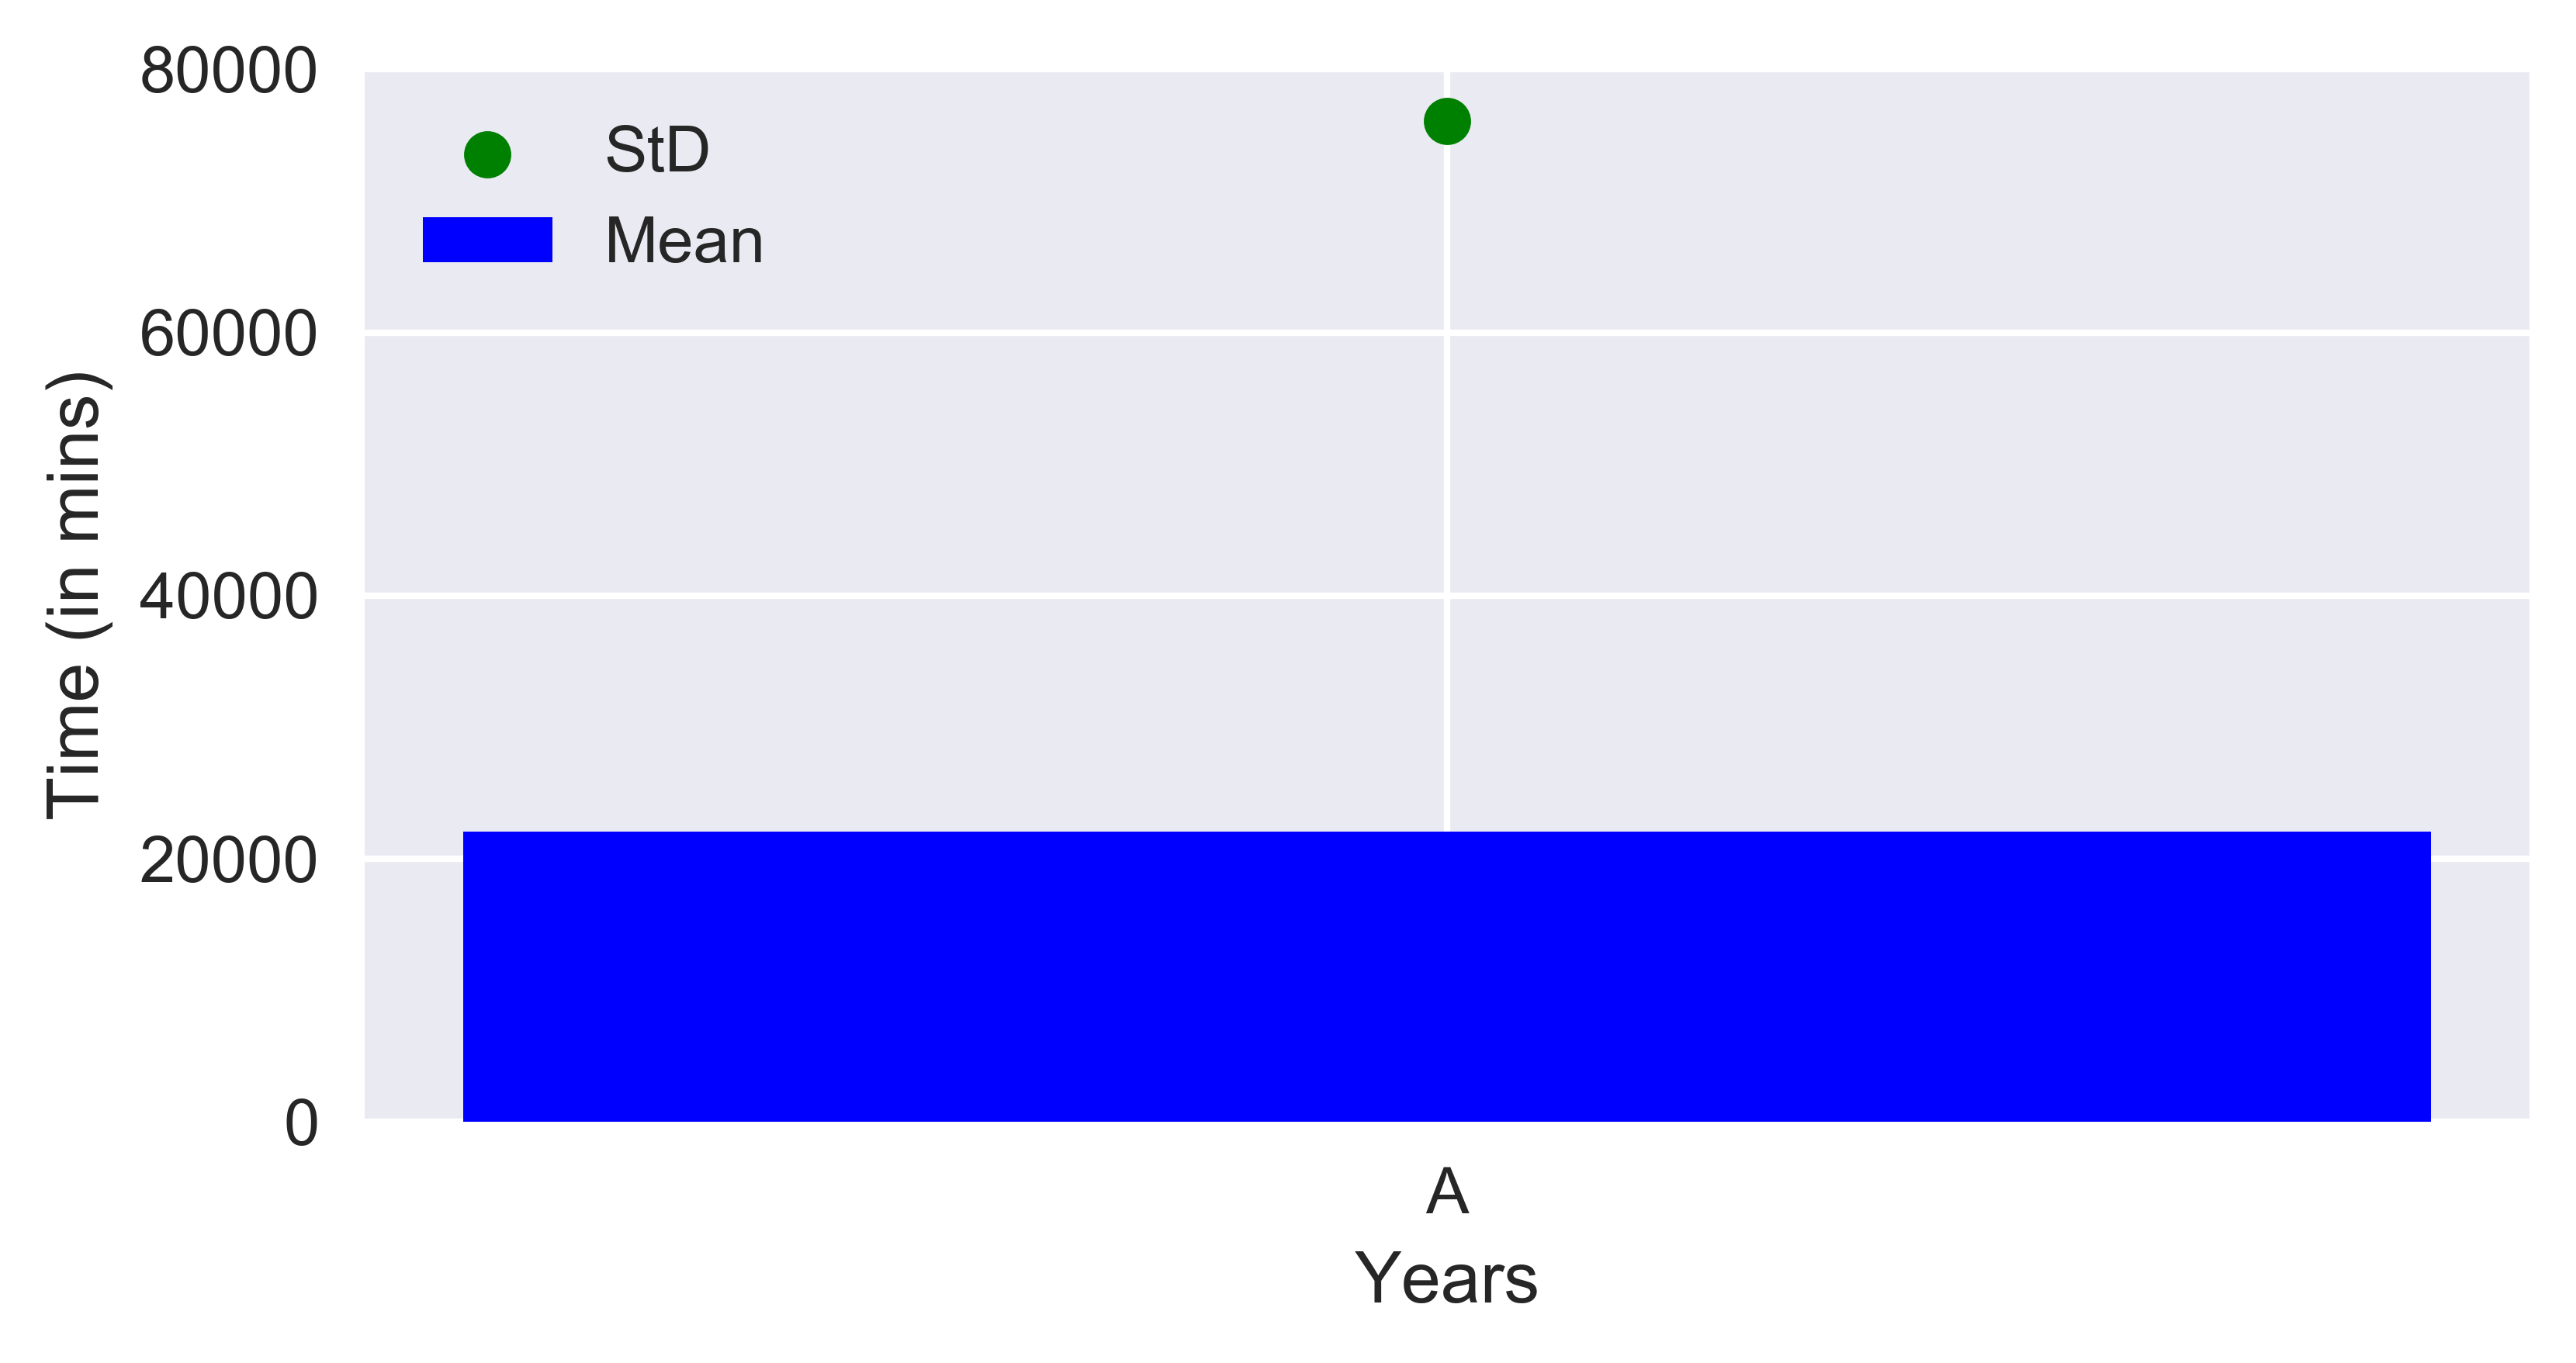

2 2
[1, 2] ['android', 'dba']


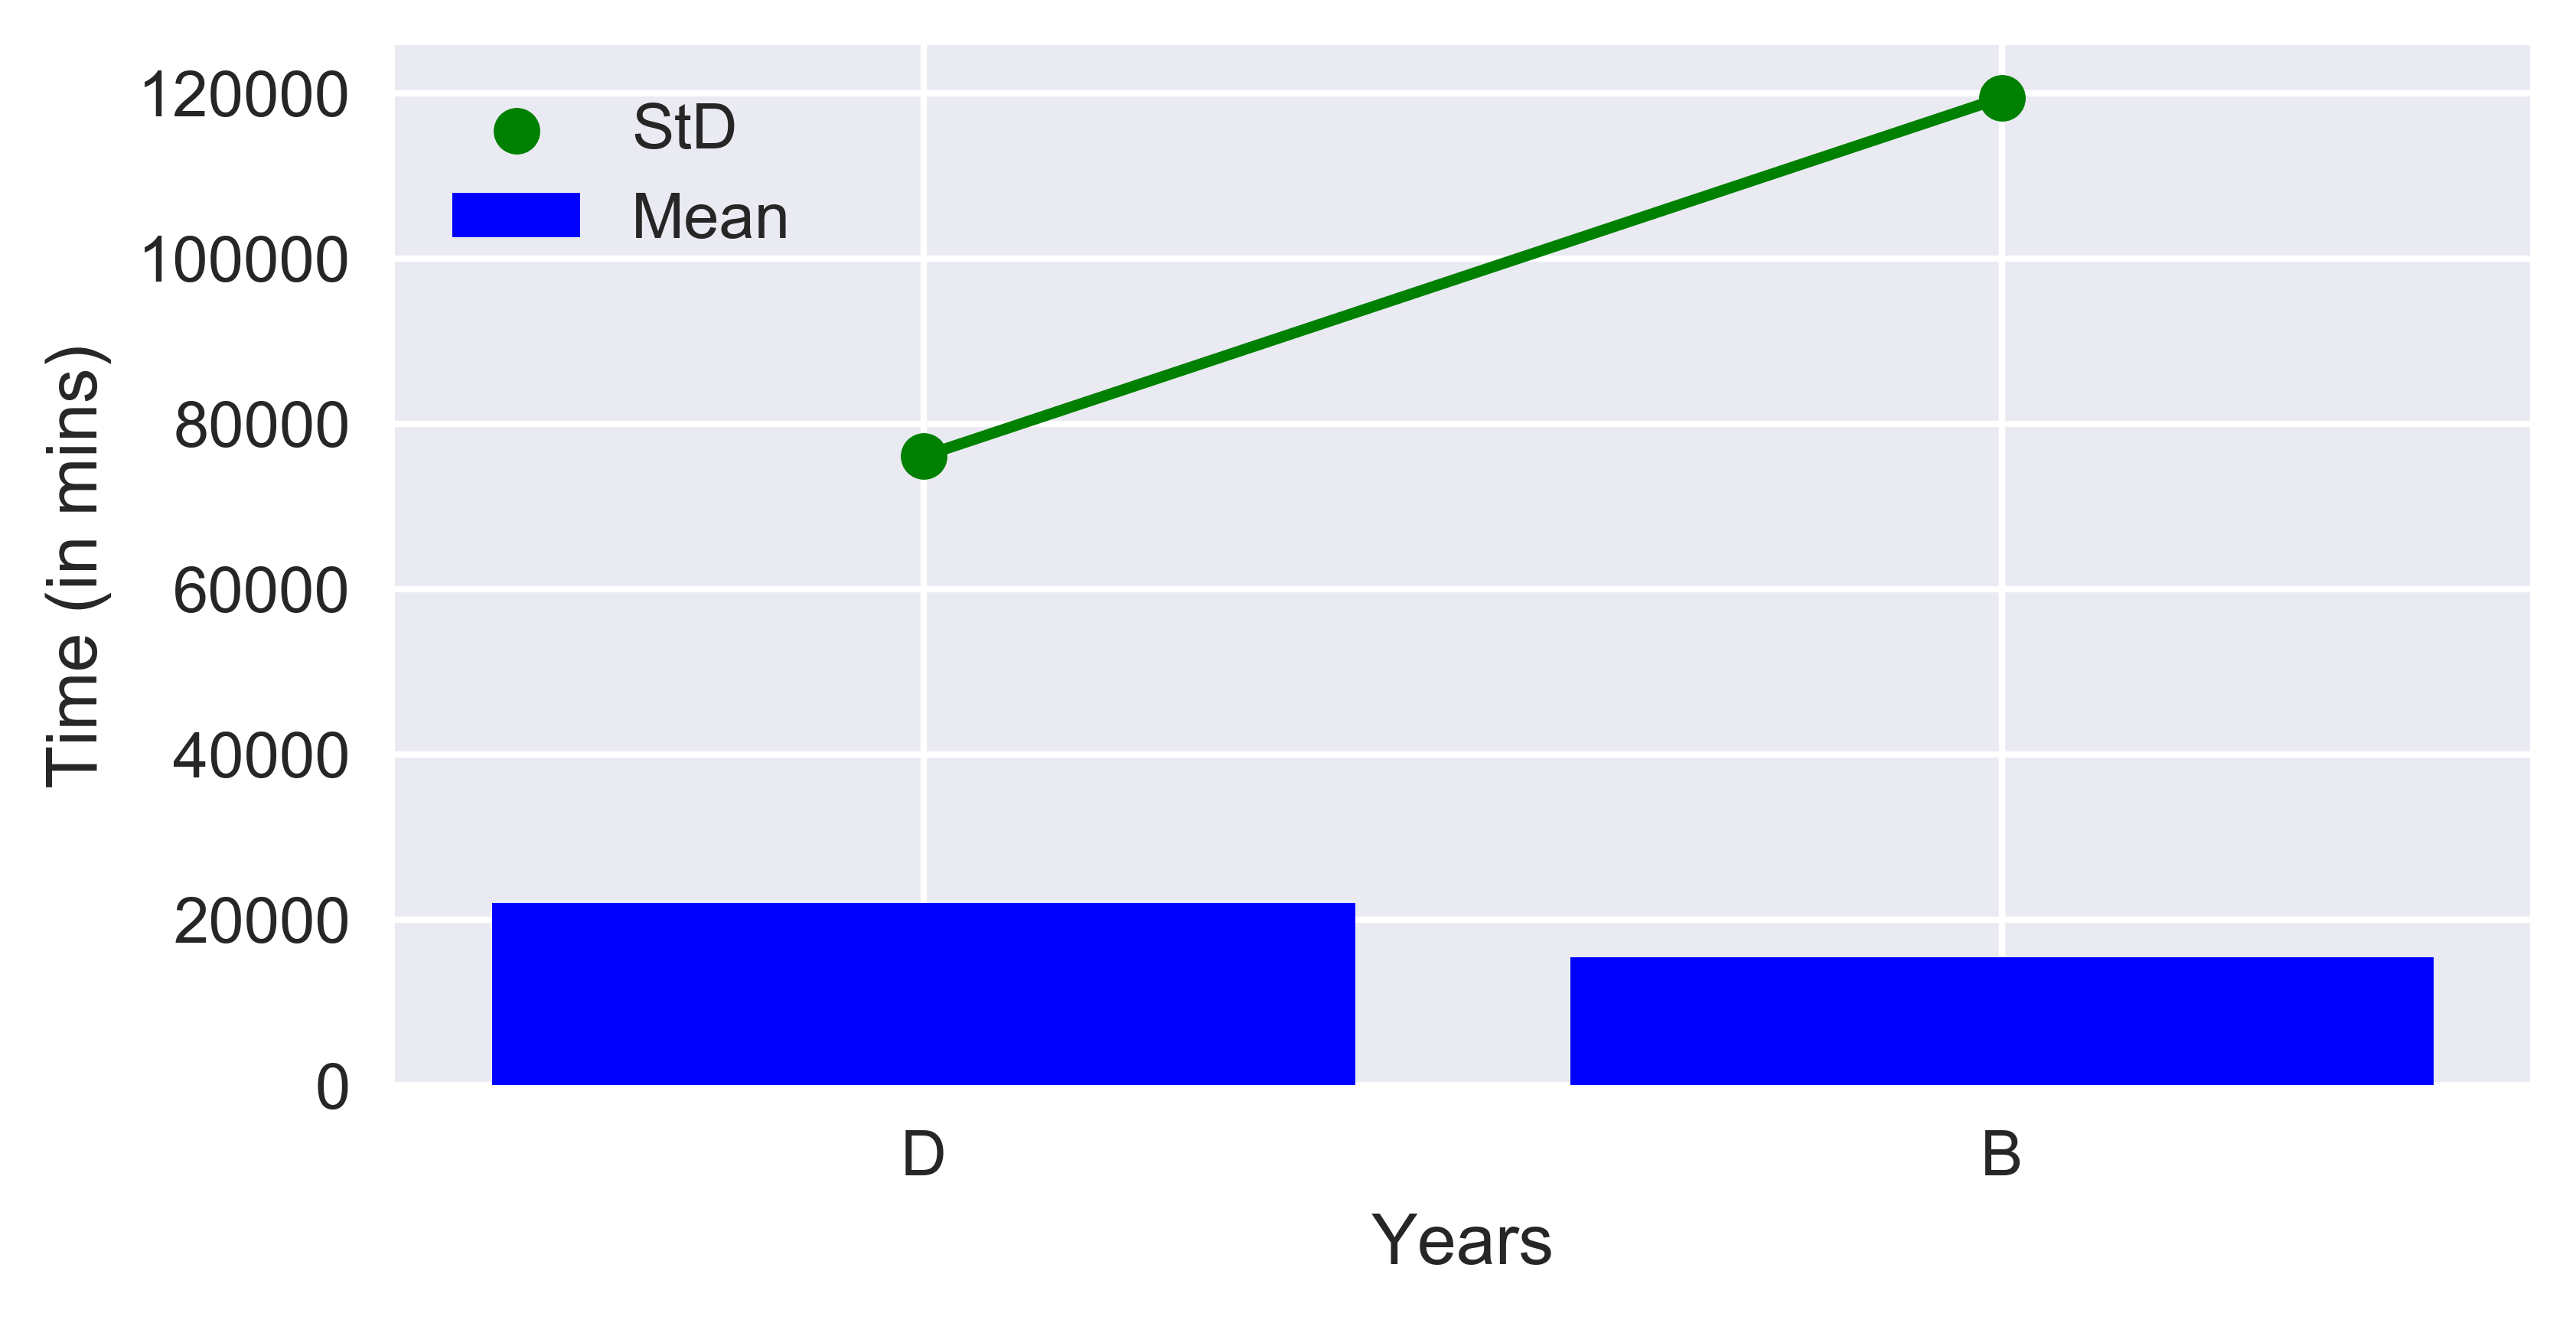

0 0
[1, 2, 3] ['android', 'dba', 'softwareEng']


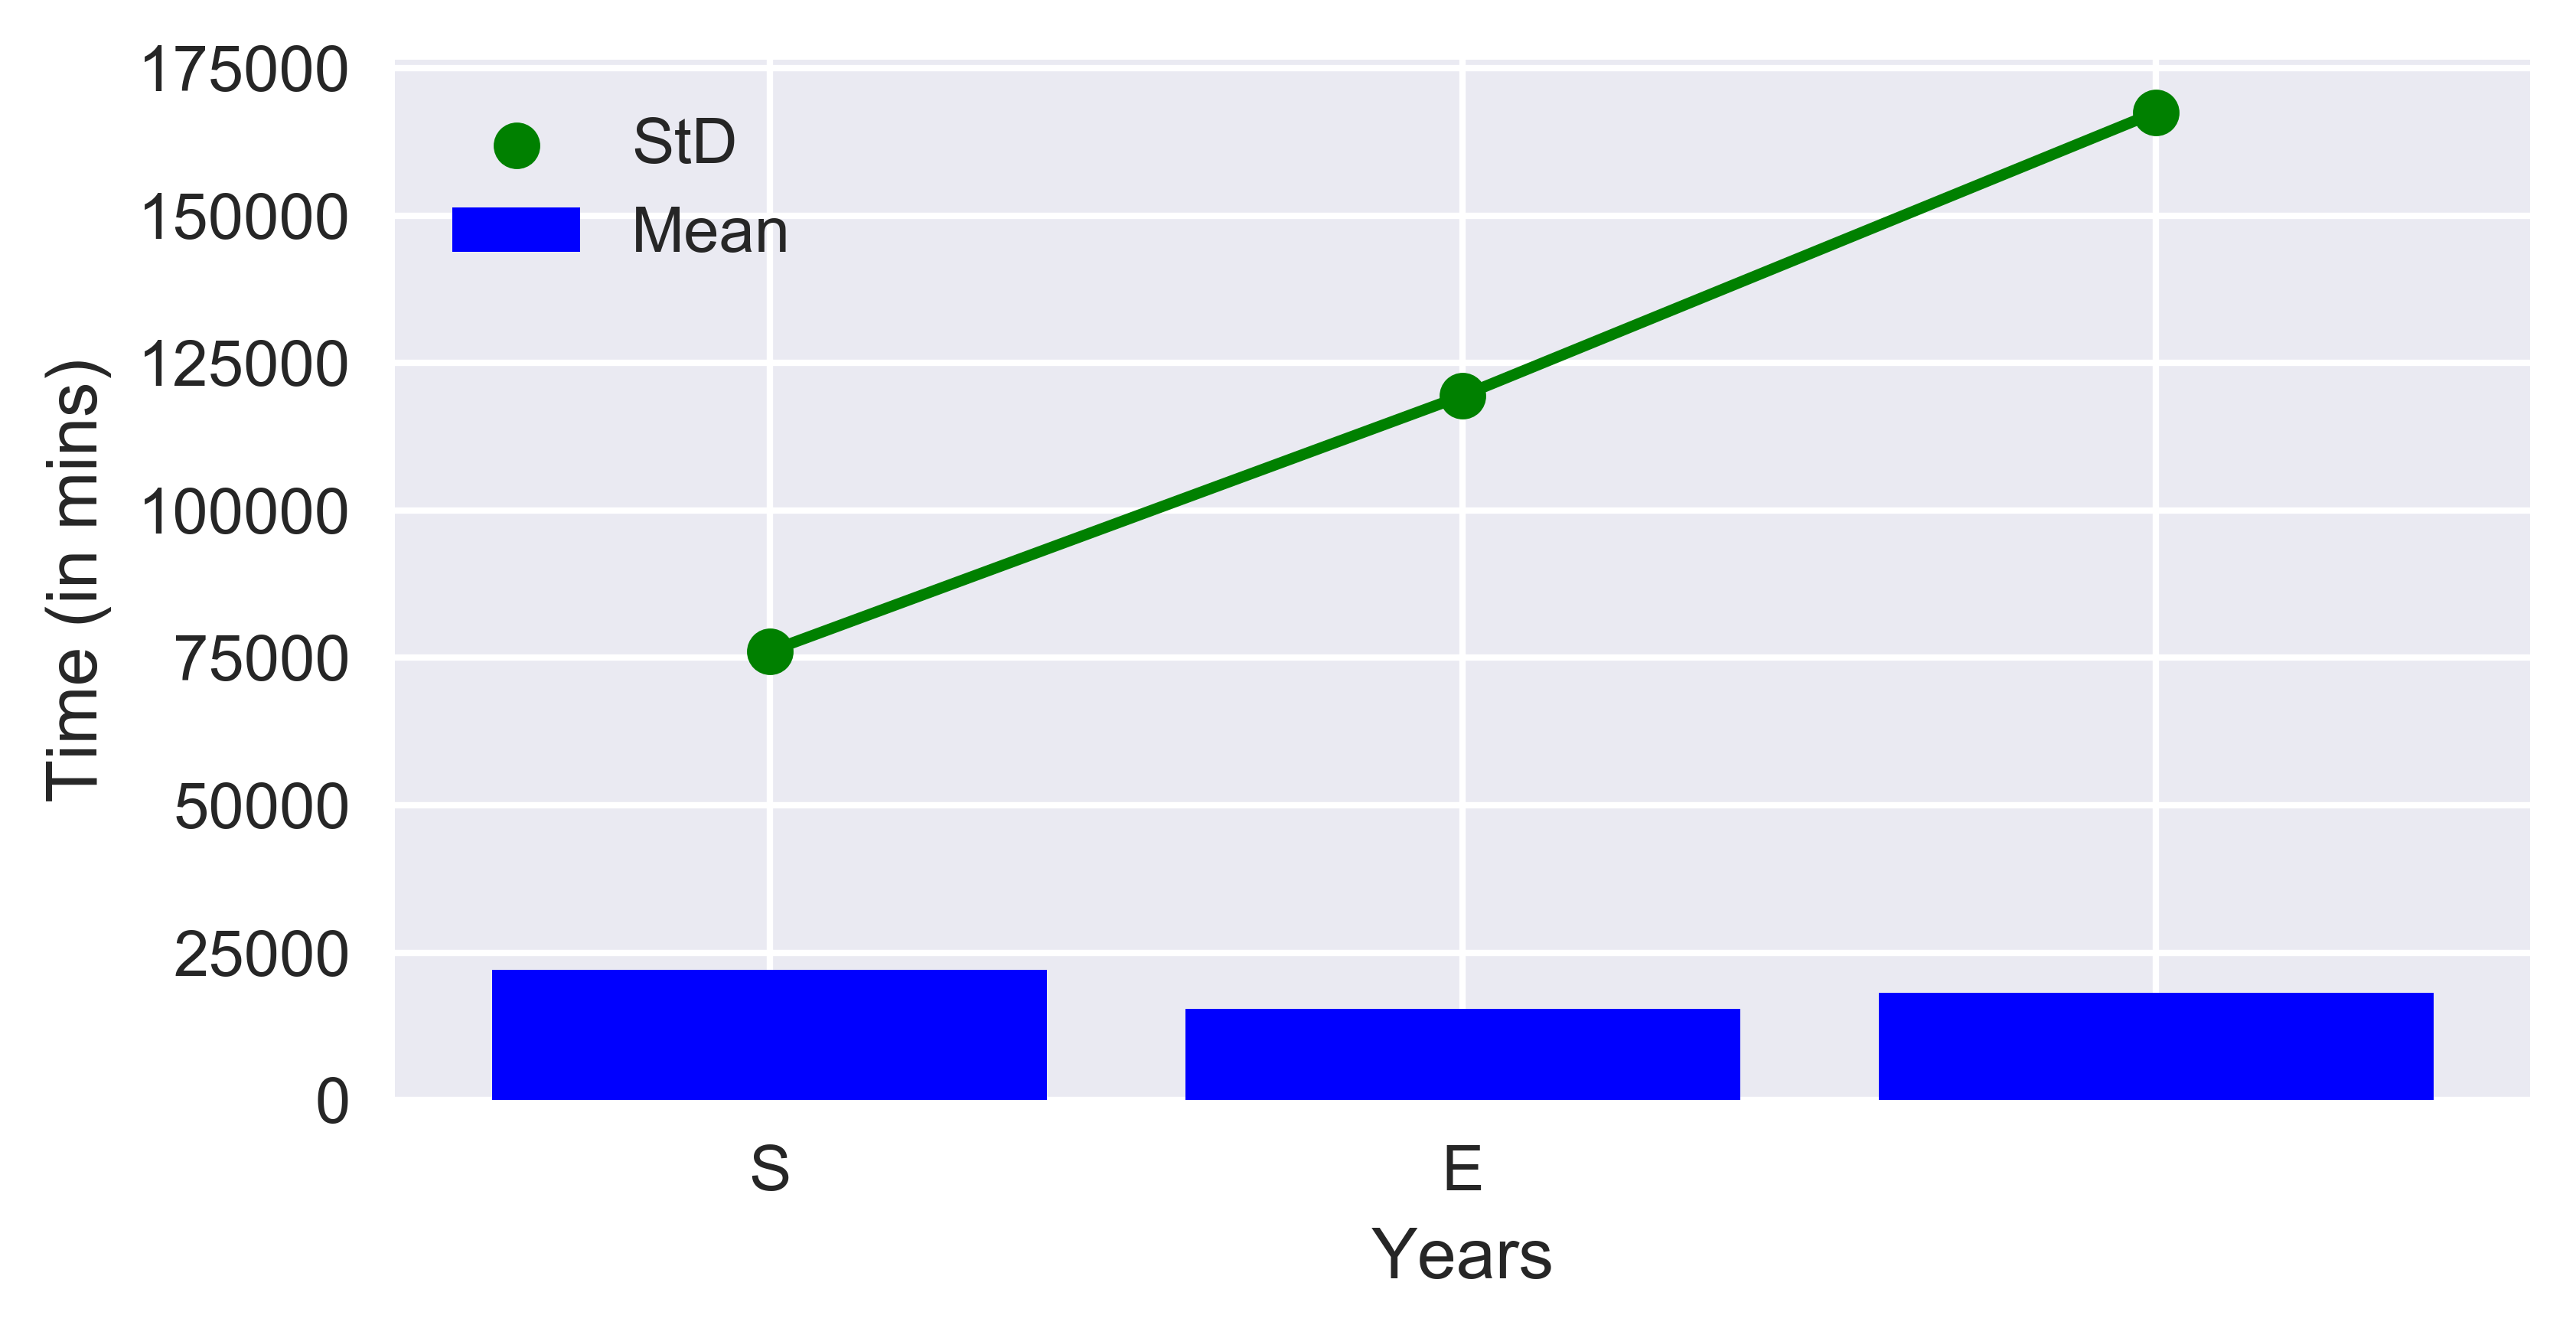

8 8
[1, 2, 3, 4] ['android', 'dba', 'softwareEng', 'serverfault']


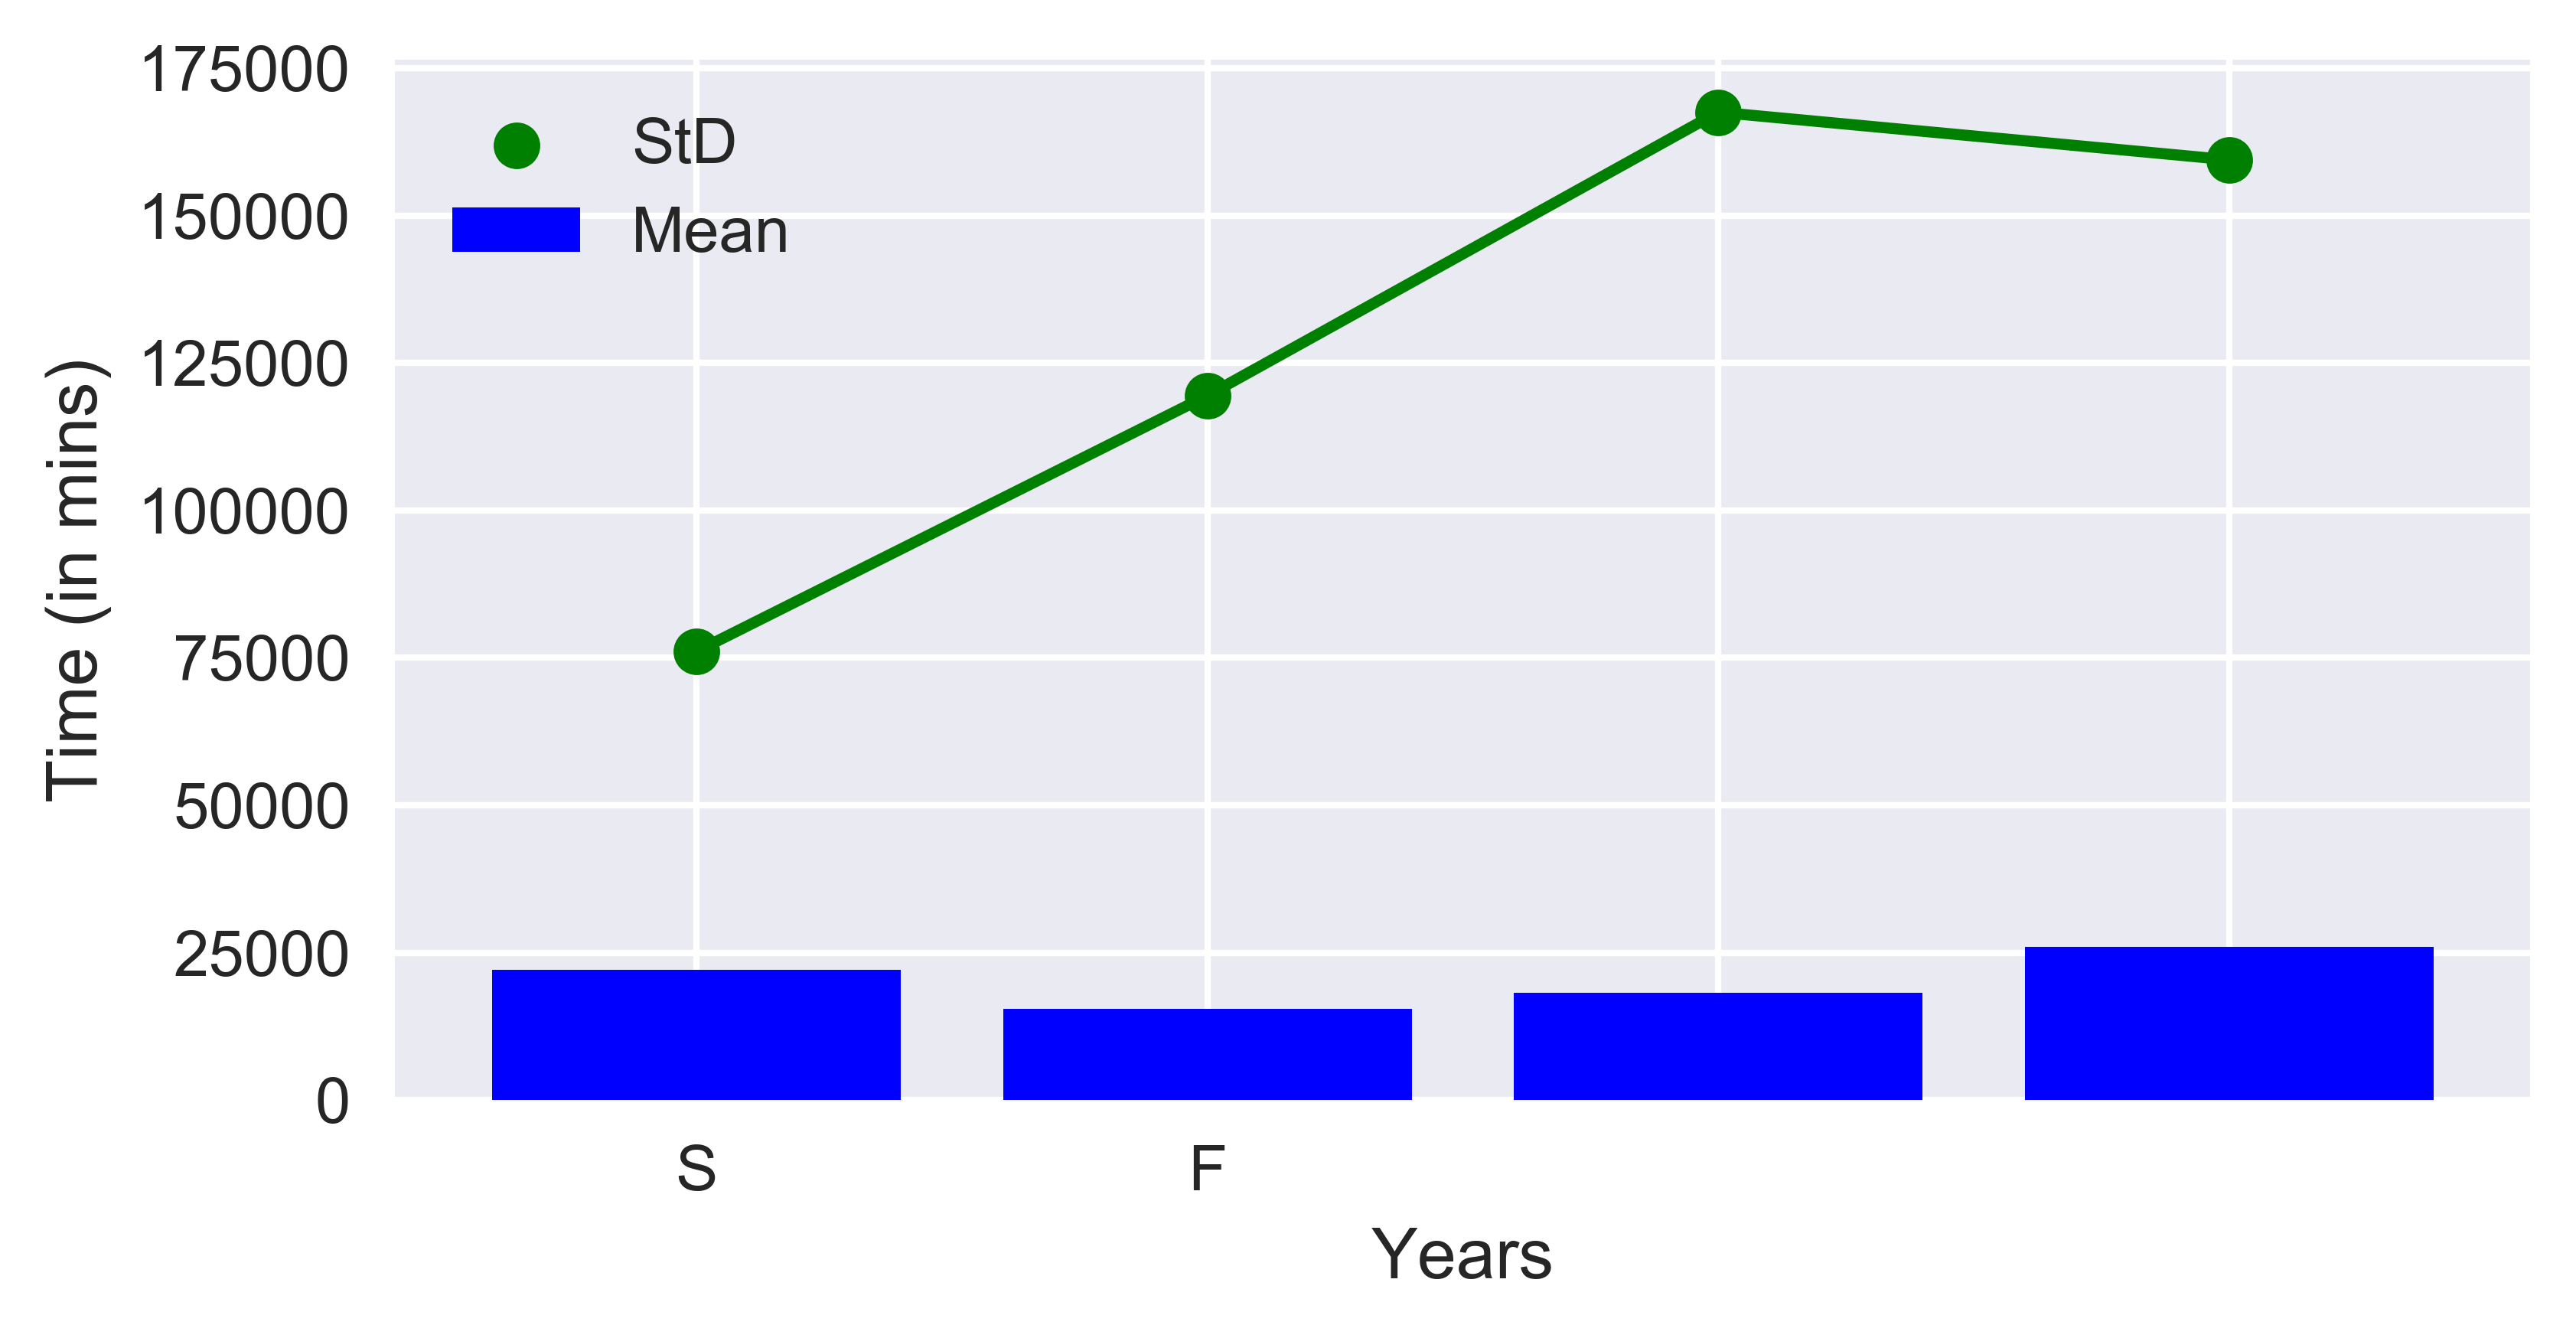

3 3
[1, 2, 3, 4, 5] ['android', 'dba', 'softwareEng', 'serverfault', 'superuser']


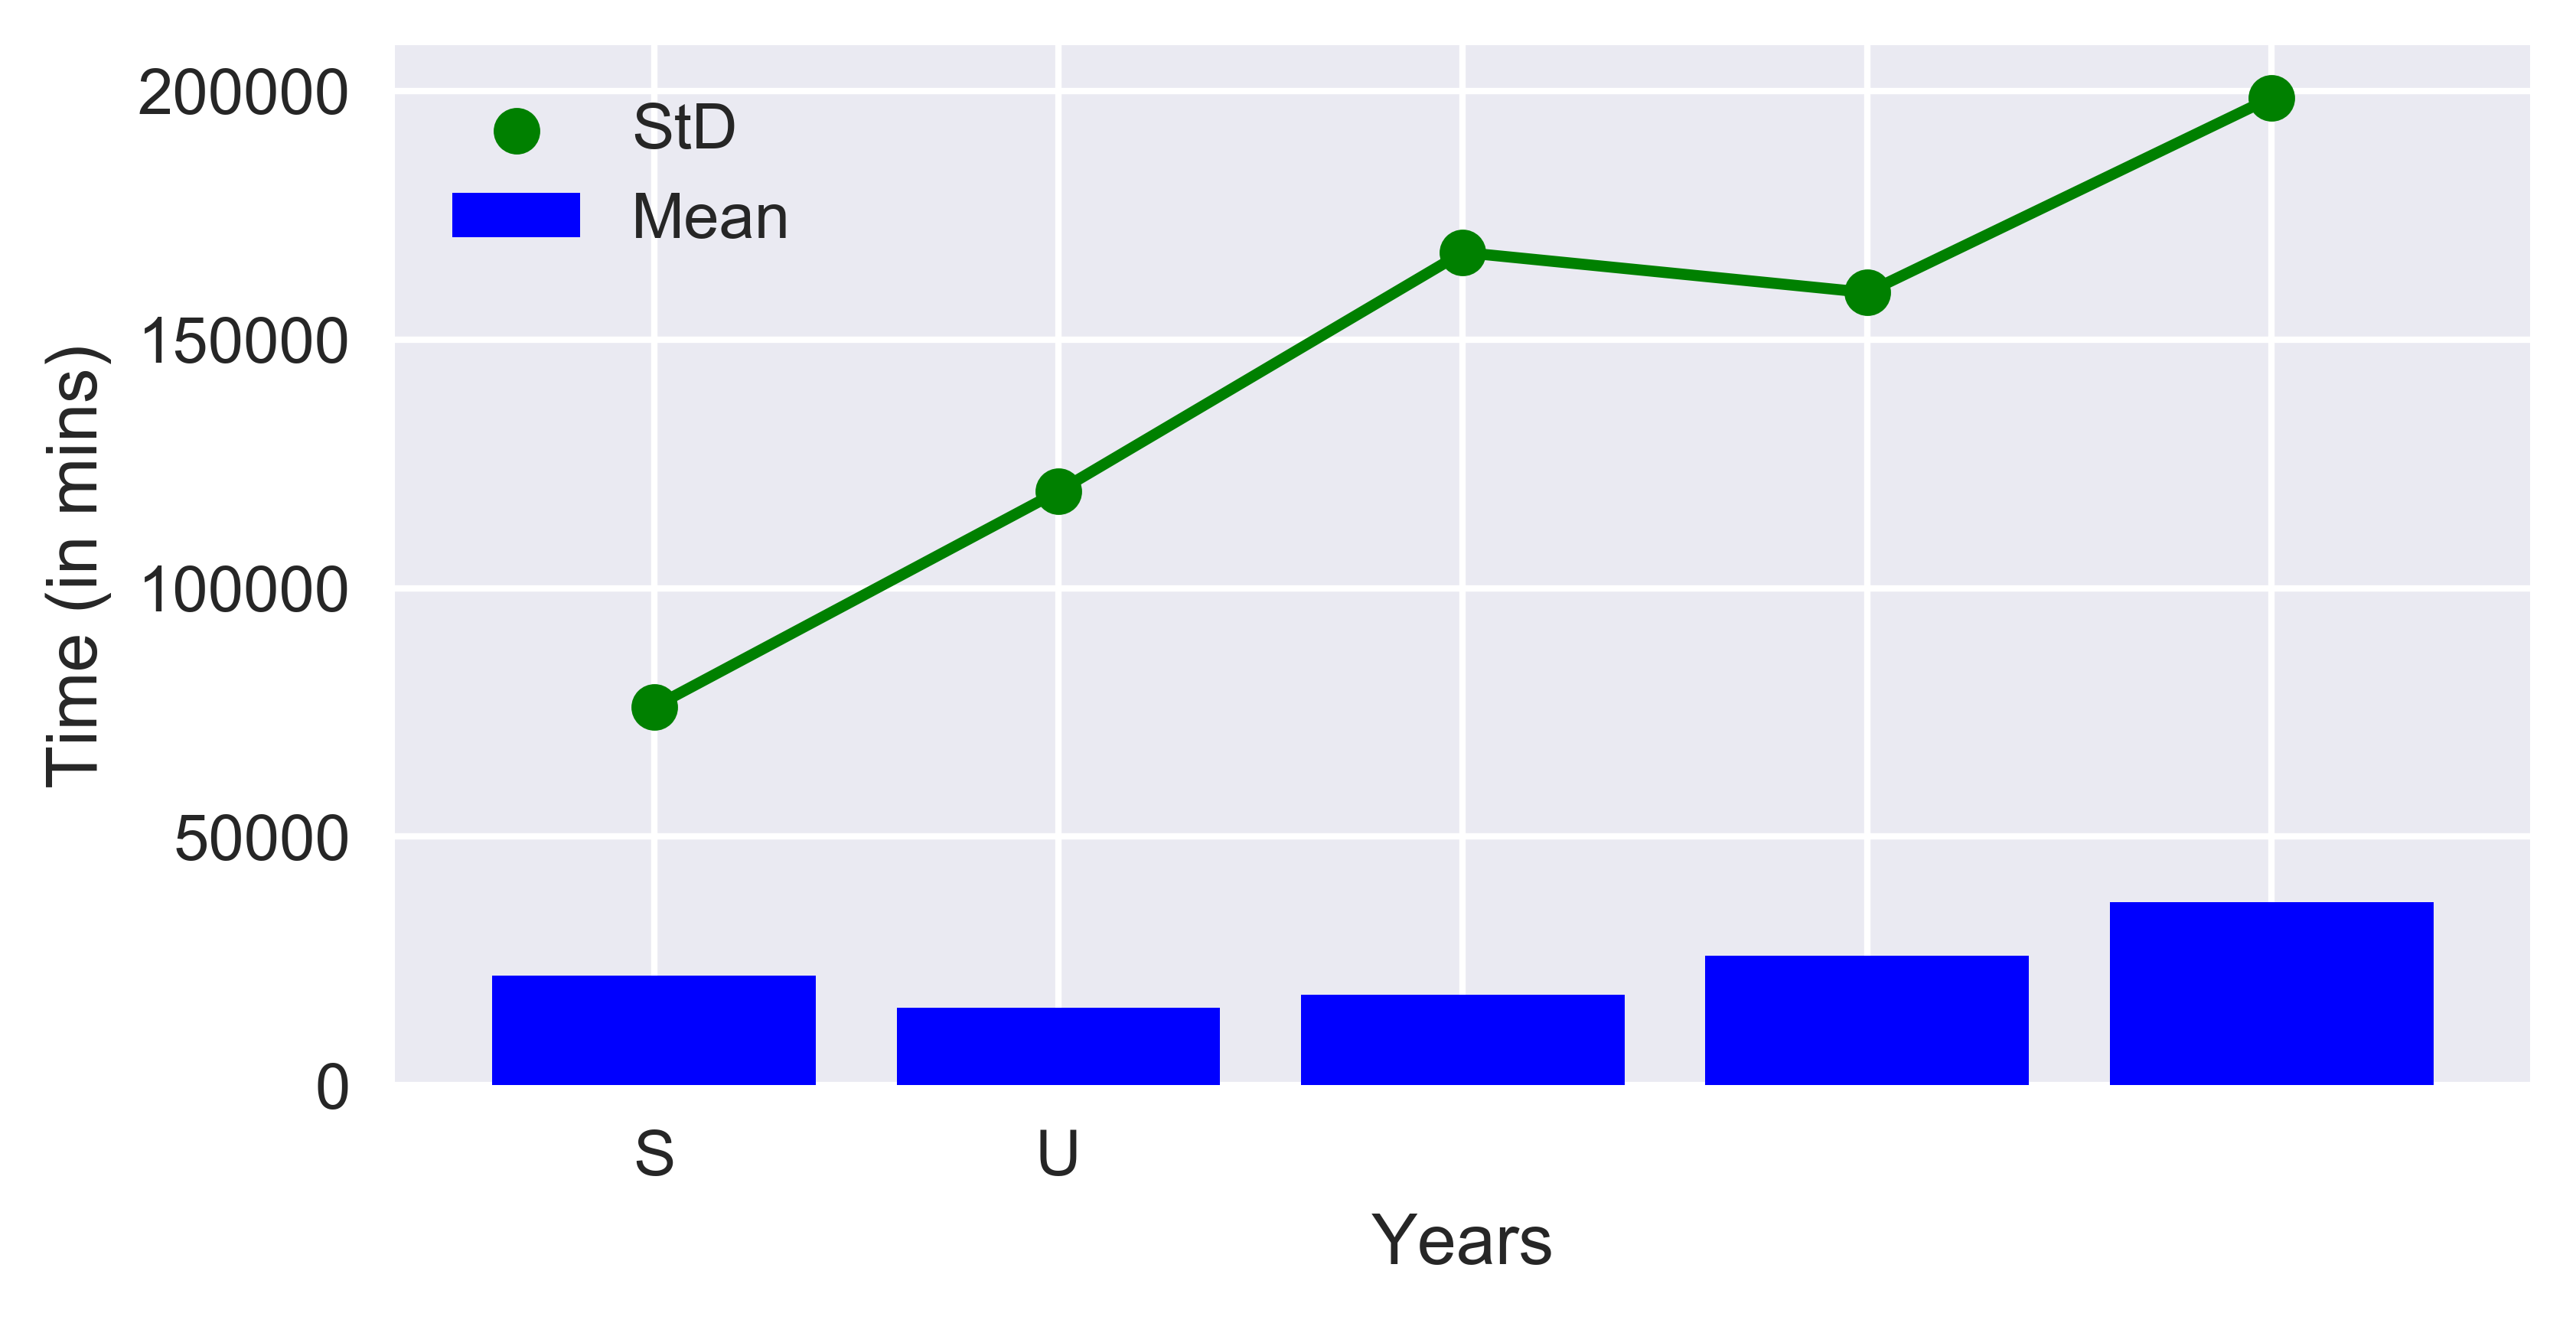

156 156
[1, 2, 3, 4, 5, 6] ['android', 'dba', 'softwareEng', 'serverfault', 'superuser', 'stackoverflow']


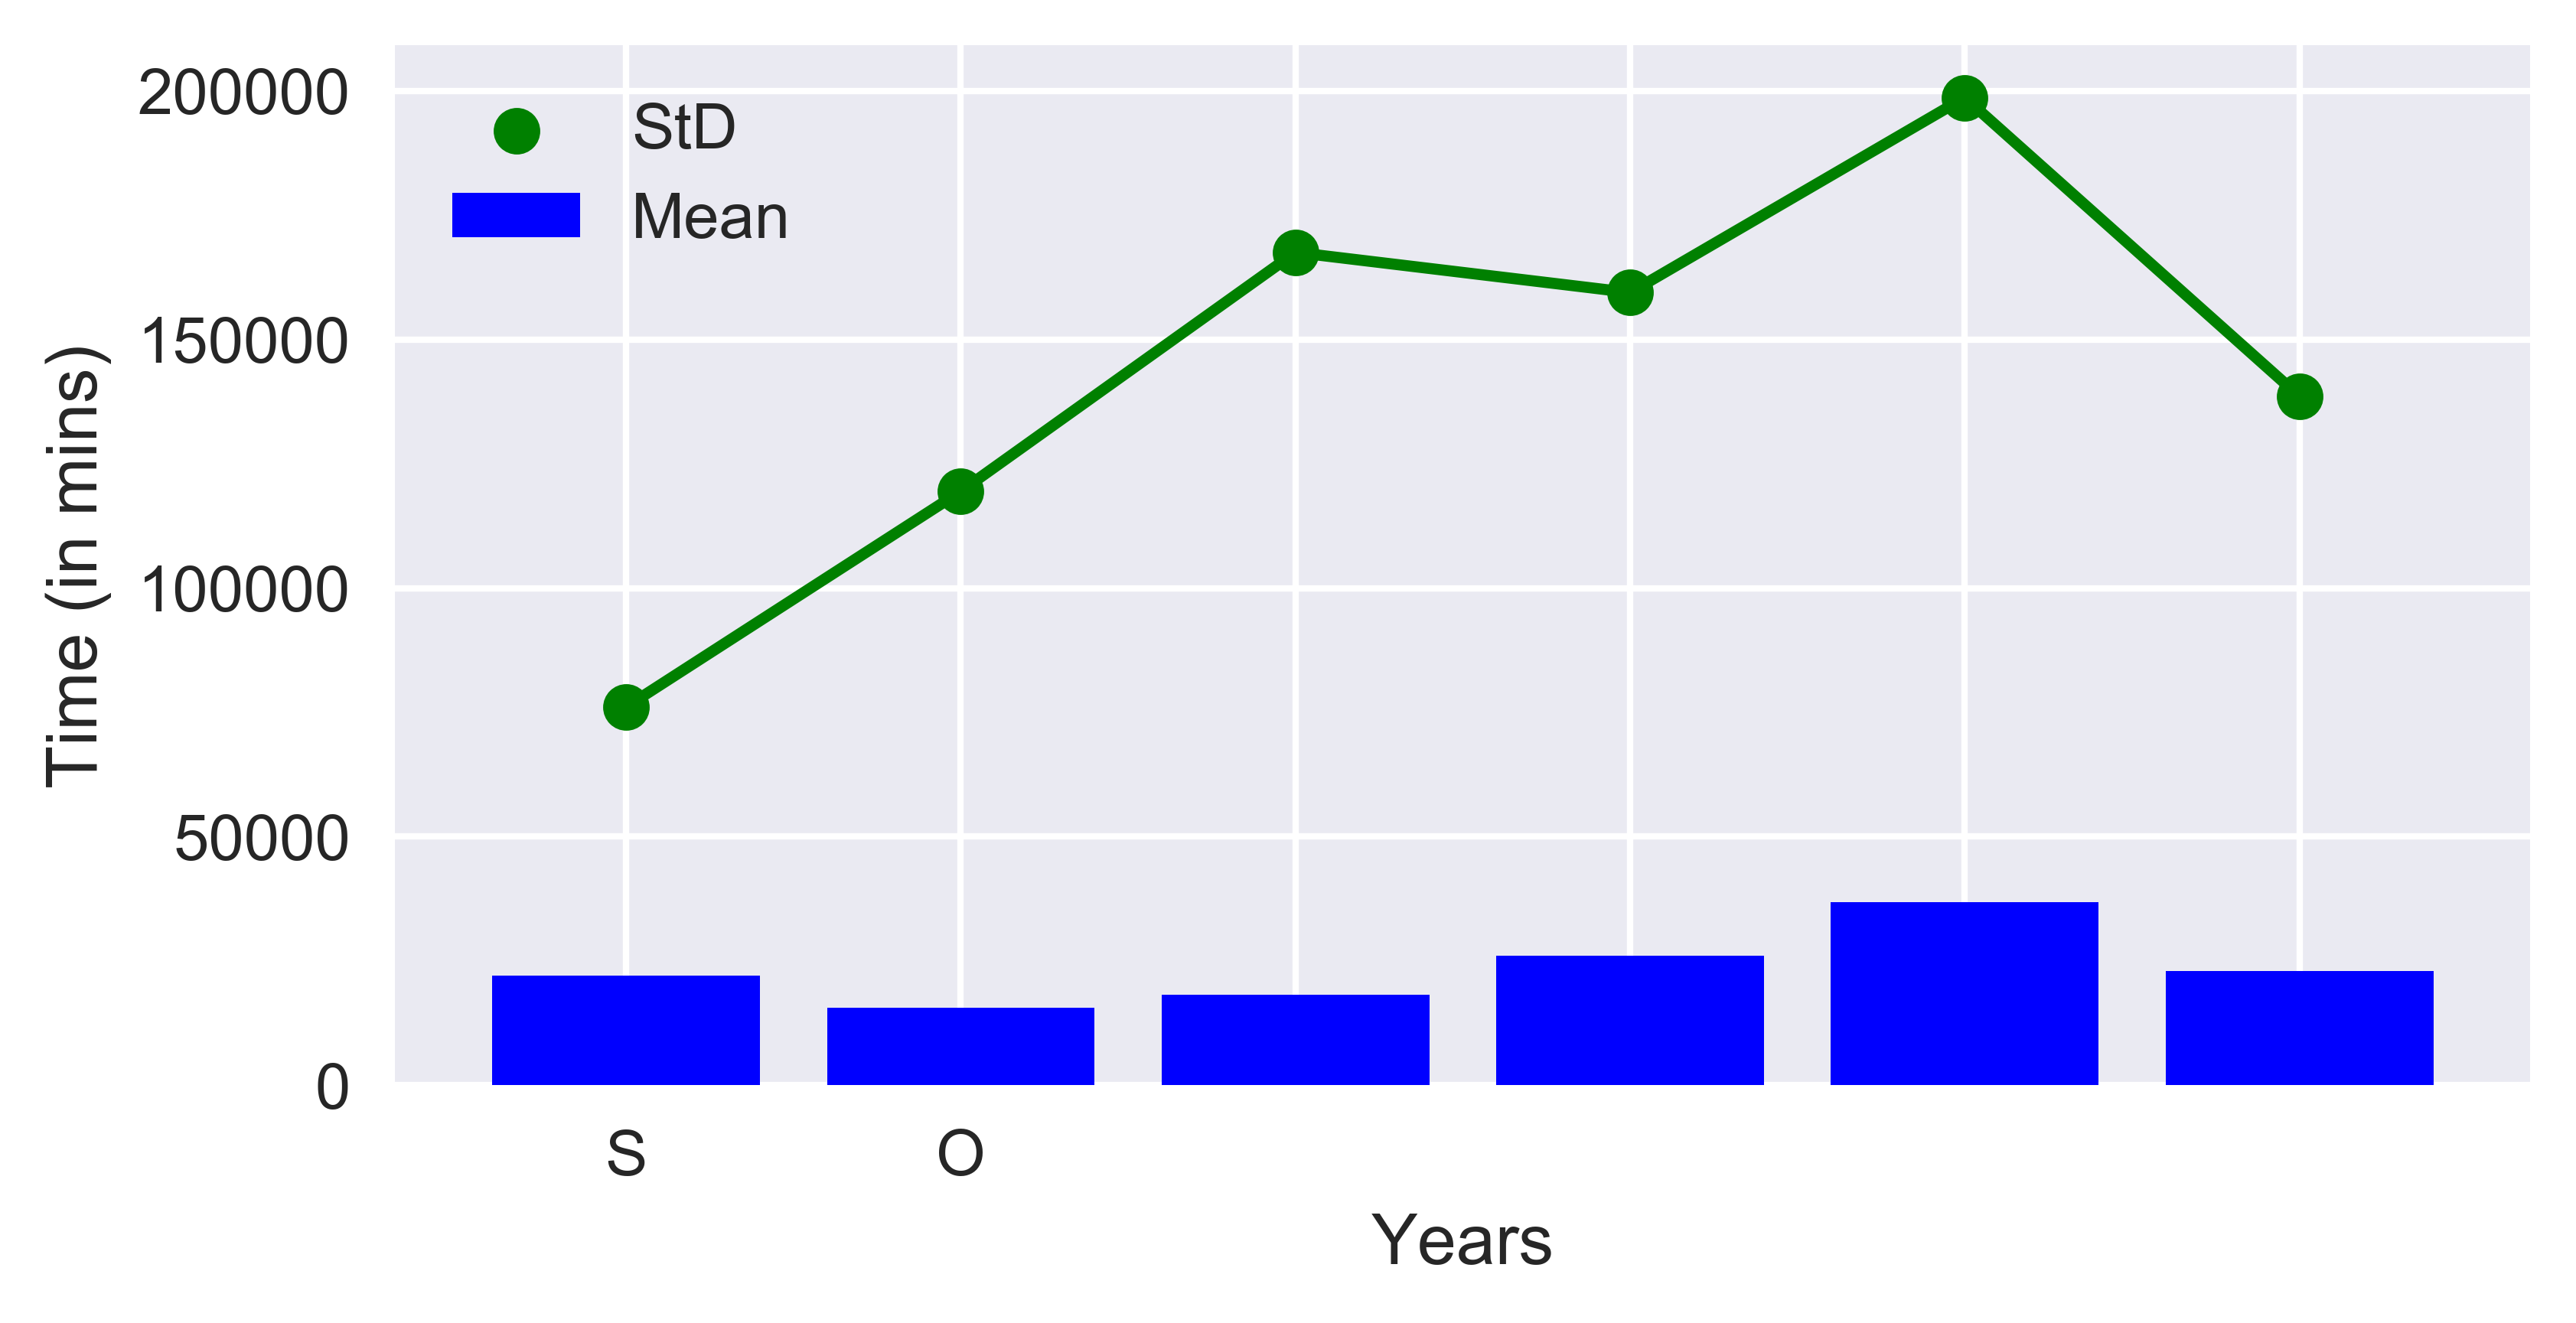

odict_keys(['android', 'dba', 'softwareEng', 'serverfault', 'superuser', 'stackoverflow'])
[1, 2, 3, 4, 5, 6] ['android', 'dba', 'softwareEng', 'serverfault', 'superuser', 'stackoverflow']


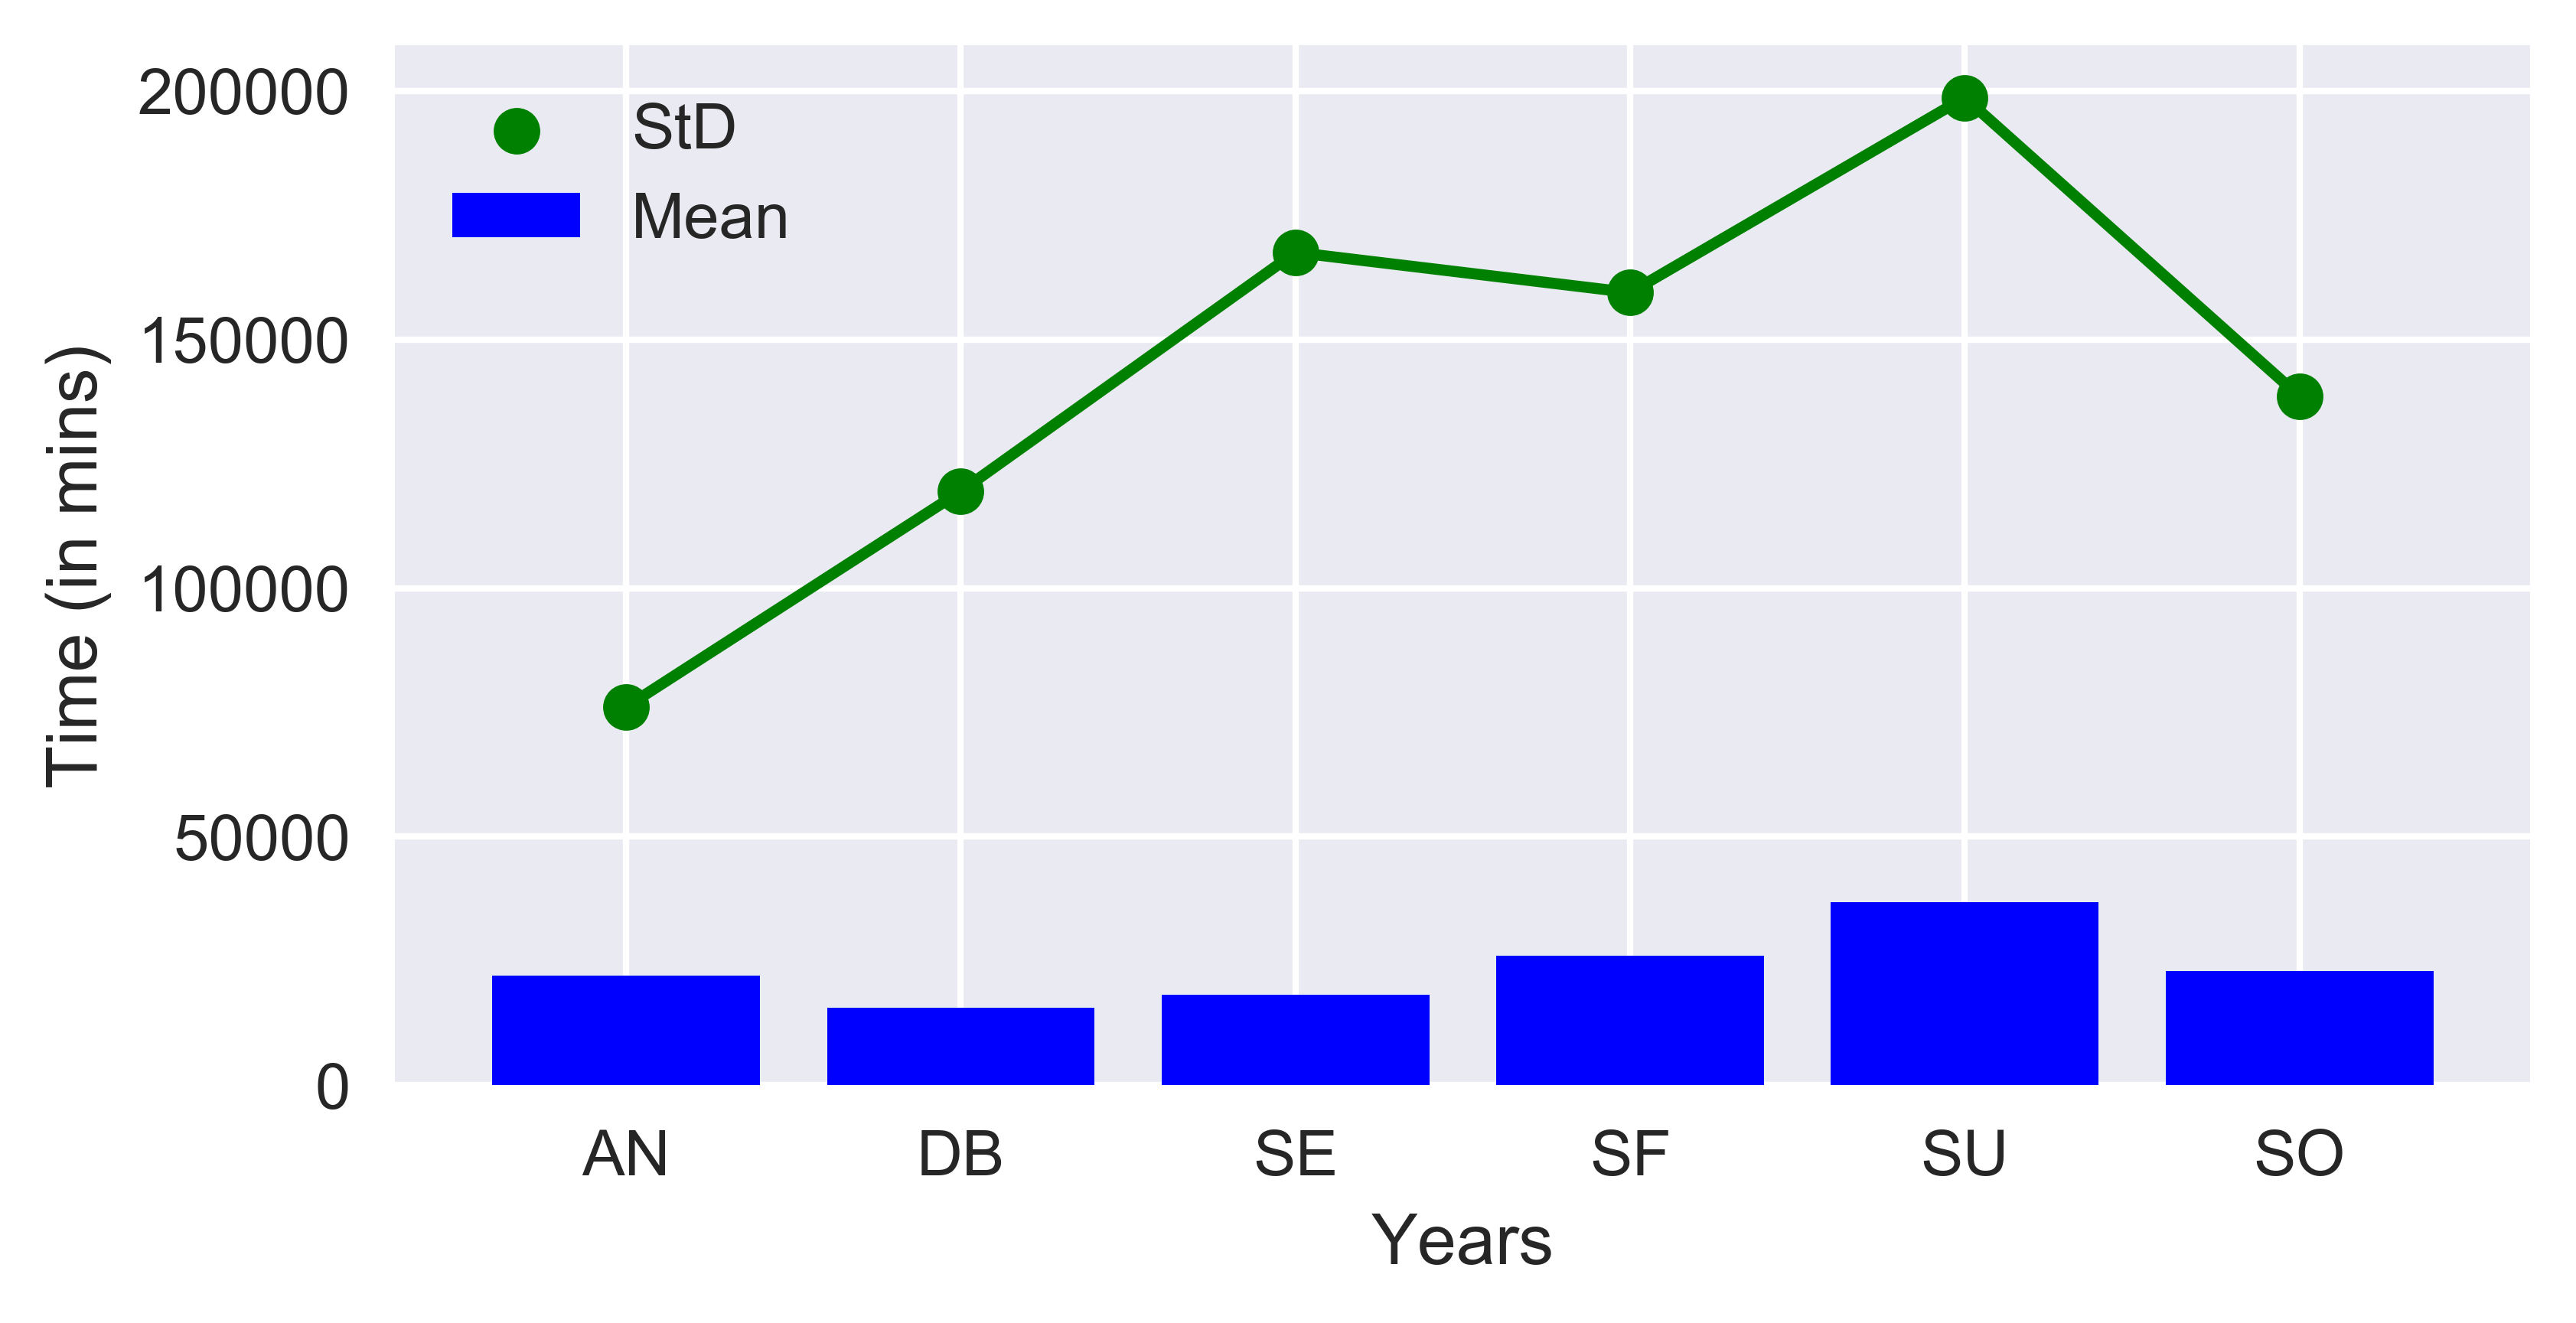

In [14]:
data=OrderedDict()
fb=open("tdata/boxplotData.csv","w")
fb.write("website,min,max,q1,q2,q3\n")

fm=open("tdata/meanData.csv","w")
fm.write("website,mean,std\n")
ticks=["AN","DB","SE","SF","SU","SO"]
for fname, tick in zip(list(datamap.keys()),ticks):
    data=distribute_posts(fname,data)
    meanPlot(data,fname,tick,fm)
    

print(data.keys())
#boxplt(data,fname,fname,ticks,fb)
meanPlot(data,fname,ticks,fm)
